# 🧬 Analyze scFoundation Embeddings

In this notebook, we load and explore the scFoundation bulk embeddings to understand their structure, distribution, and variation before applying dimensionality reduction (PCA).


In [1]:
import pandas as pd

# Load the embeddings + tissue annotations
embedding_df = pd.read_parquet("../../data/processed/pancancer_embeddings_tissue.parquet")

# Remove duplicates to ensure one row per cell line
embedding_unique = embedding_df.drop_duplicates(subset="SANGER_MODEL_ID").copy()


## 📥 Load and Inspect Embeddings

Let's load the `.npy` file containing scFoundation embeddings and look at its basic properties.


In [3]:
from sklearn.preprocessing import StandardScaler

# Get embedding features
embedding_cols = [col for col in embedding_unique.columns if col.startswith("PC")]

# Extract and scale the embeddings
X_emb = StandardScaler().fit_transform(embedding_unique[embedding_cols].values)


## 📊 Basic Embedding Statistics

Let's check the distribution of embedding norms and per-dimension statistics.


In [4]:
from sklearn.manifold import TSNE

tsne_emb = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne_emb.fit_transform(X_emb)

# Add t-SNE coordinates to DataFrame
embedding_unique["TSNE_1"] = tsne_coords[:, 0]
embedding_unique["TSNE_2"] = tsne_coords[:, 1]


In [5]:
# Convert one-hot tissue columns to single label
tissue_cols = [col for col in embedding_unique.columns if col.startswith("Tissue_")]
embedding_unique["Tissue"] = (
    embedding_unique[tissue_cols]
    .idxmax(axis=1)
    .str.replace("Tissue_", "")
    .str.replace("_", " ")
)


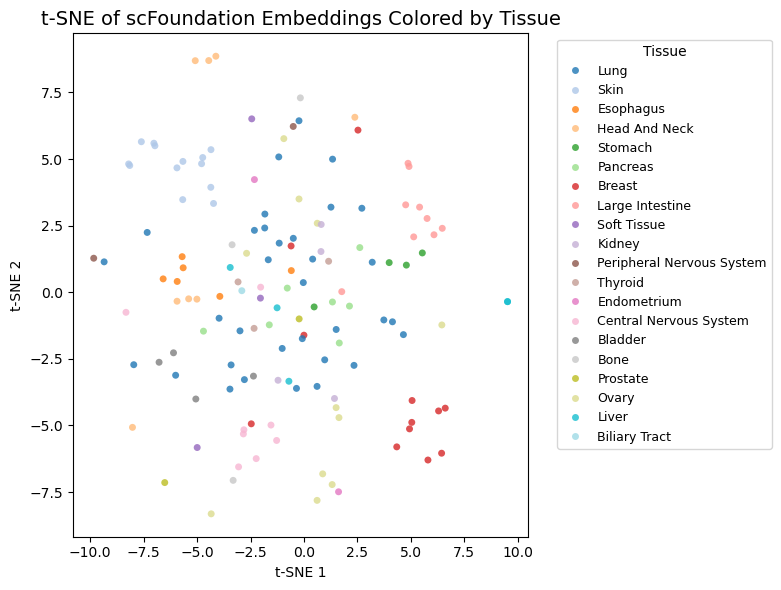

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=embedding_unique,
    x="TSNE_1",
    y="TSNE_2",
    hue="Tissue",
    palette="tab20",
    s=25,
    alpha=0.8,
    edgecolor="none"
)
plt.title("t-SNE of scFoundation Embeddings Colored by Tissue", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Tissue", fontsize=9)
plt.tight_layout()
plt.show()


## 🌀 Optional: Visualize Embeddings with t-SNE

We'll use t-SNE to visualize global structure in 2D.


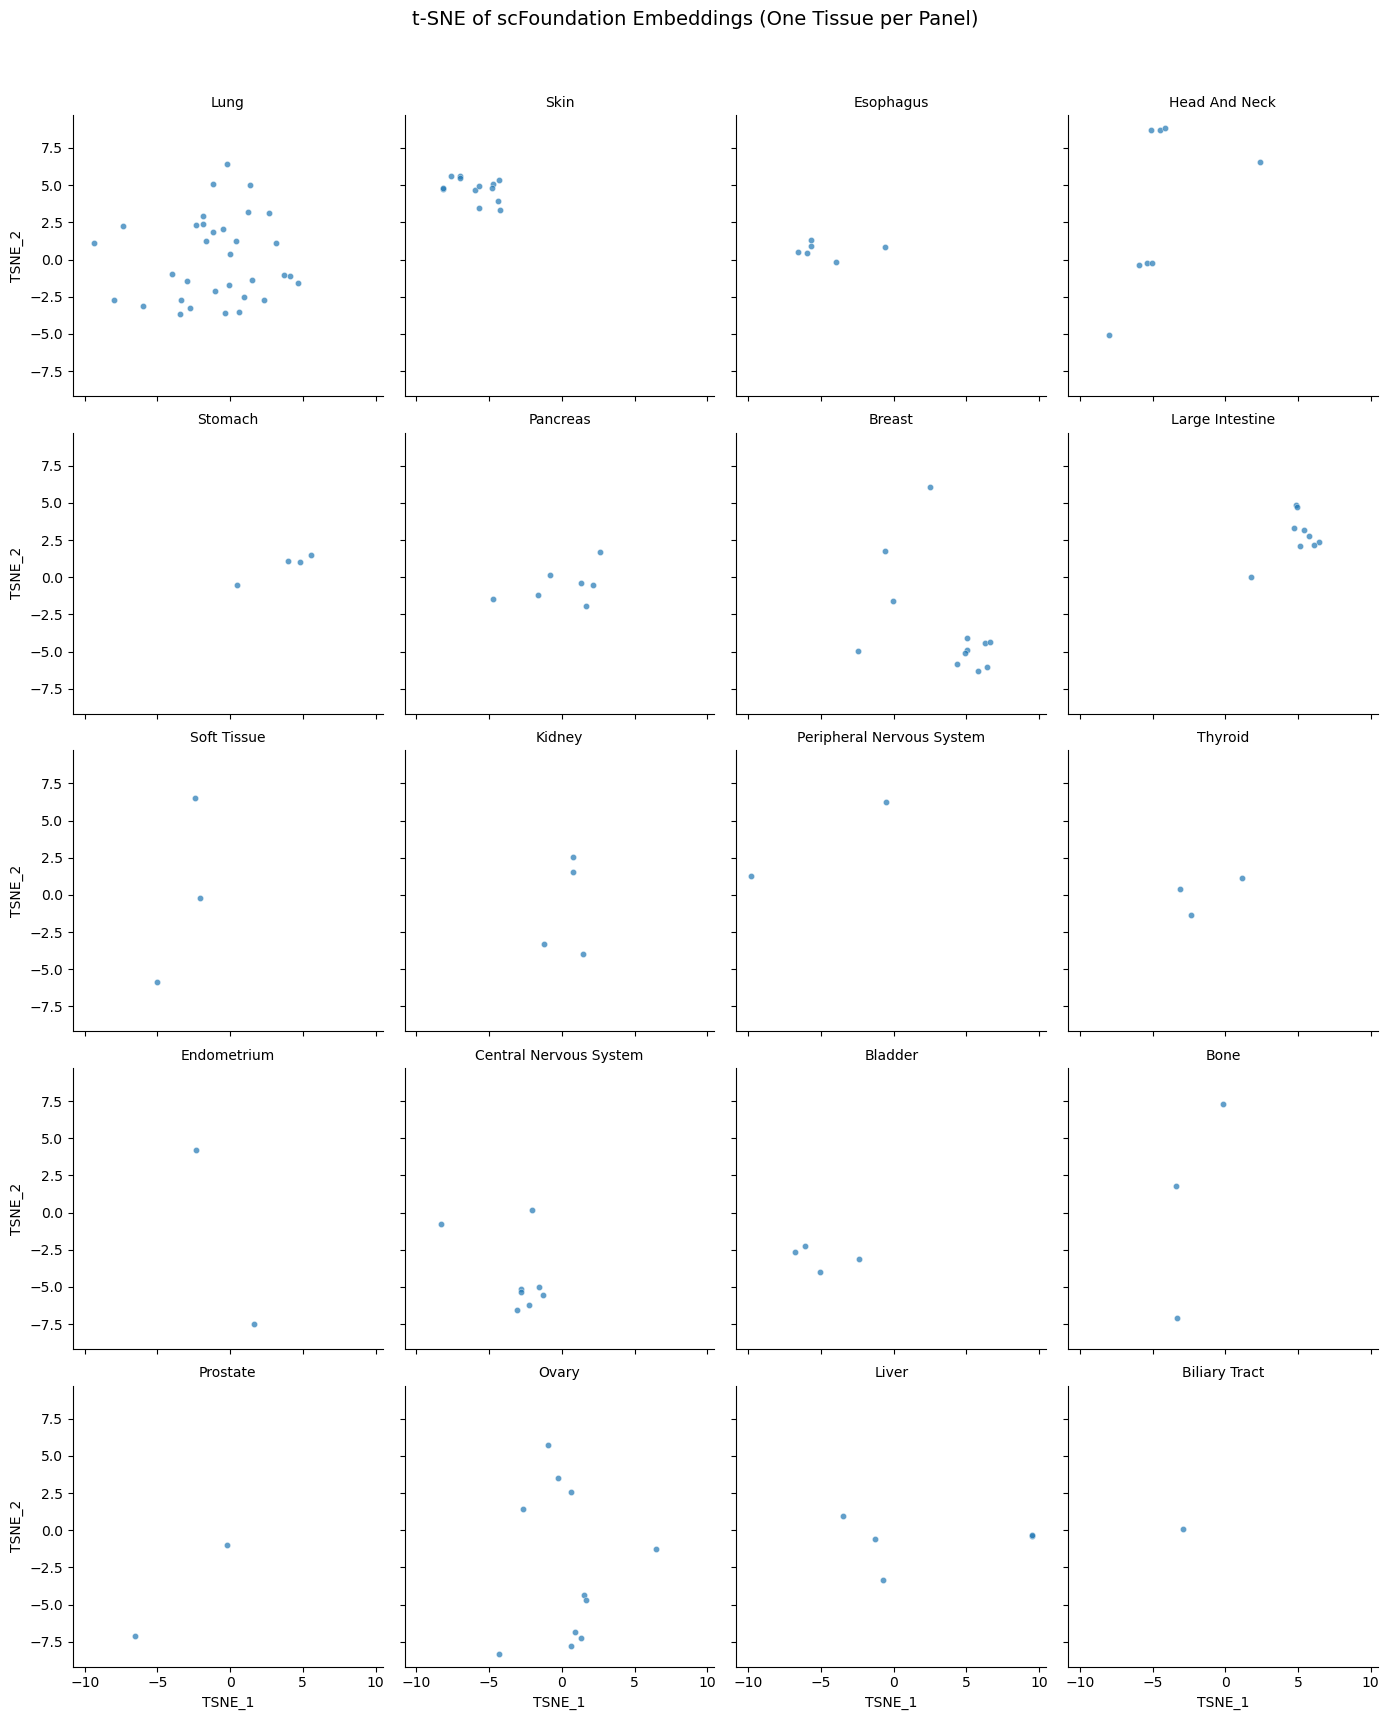

In [8]:
g = sns.FacetGrid(embedding_unique, col="Tissue", col_wrap=4, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="TSNE_1", y="TSNE_2", s=20, alpha=0.7)
g.set_titles(col_template="{col_name}", size=10)
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("t-SNE of scFoundation Embeddings (One Tissue per Panel)", fontsize=14)
plt.show()


## ✅ Summary and Next Step

The embeddings appear to have consistent structure and variance. We'll now move on to applying PCA in the next notebook.


In [10]:
# Count per tissue
cell_lines_per_tissue = embedding_unique.groupby("Tissue")["SANGER_MODEL_ID"].nunique().sort_values(ascending=False)

# Total count
total_cell_lines = embedding_unique["SANGER_MODEL_ID"].nunique()

# Display
print("📊 Number of unique cell lines per tissue:")
print(cell_lines_per_tissue)
print(f"\n🔢 Total unique cell lines: {total_cell_lines}")


📊 Number of unique cell lines per tissue:
Tissue
Lung                         33
Skin                         13
Breast                       12
Ovary                        11
Large Intestine               9
Central Nervous System        8
Head And Neck                 8
Pancreas                      7
Esophagus                     6
Liver                         5
Bladder                       4
Kidney                        4
Stomach                       4
Bone                          3
Thyroid                       3
Soft Tissue                   3
Prostate                      2
Endometrium                   2
Peripheral Nervous System     2
Biliary Tract                 1
Name: SANGER_MODEL_ID, dtype: int64

🔢 Total unique cell lines: 140
